In [33]:
# basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, cross_validate

In [8]:
#load the dataset
dataset =load_boston()
data = pd.DataFrame(data=dataset.data)
data.columns = dataset.feature_names

In [9]:
# Create a target column with the dataset target
data['target'] = dataset.target

In [11]:
#print the first five rows
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [23]:
# check the data (exploratory analysis)

C:\Users\NimeshsinhDesai\Anaconda3\envs\SelfDrivingCar\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\NimeshsinhDesai\Anaconda3\envs\SelfDrivingCar\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\NimeshsinhDesai\Anaconda3\envs\SelfDrivingCar\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

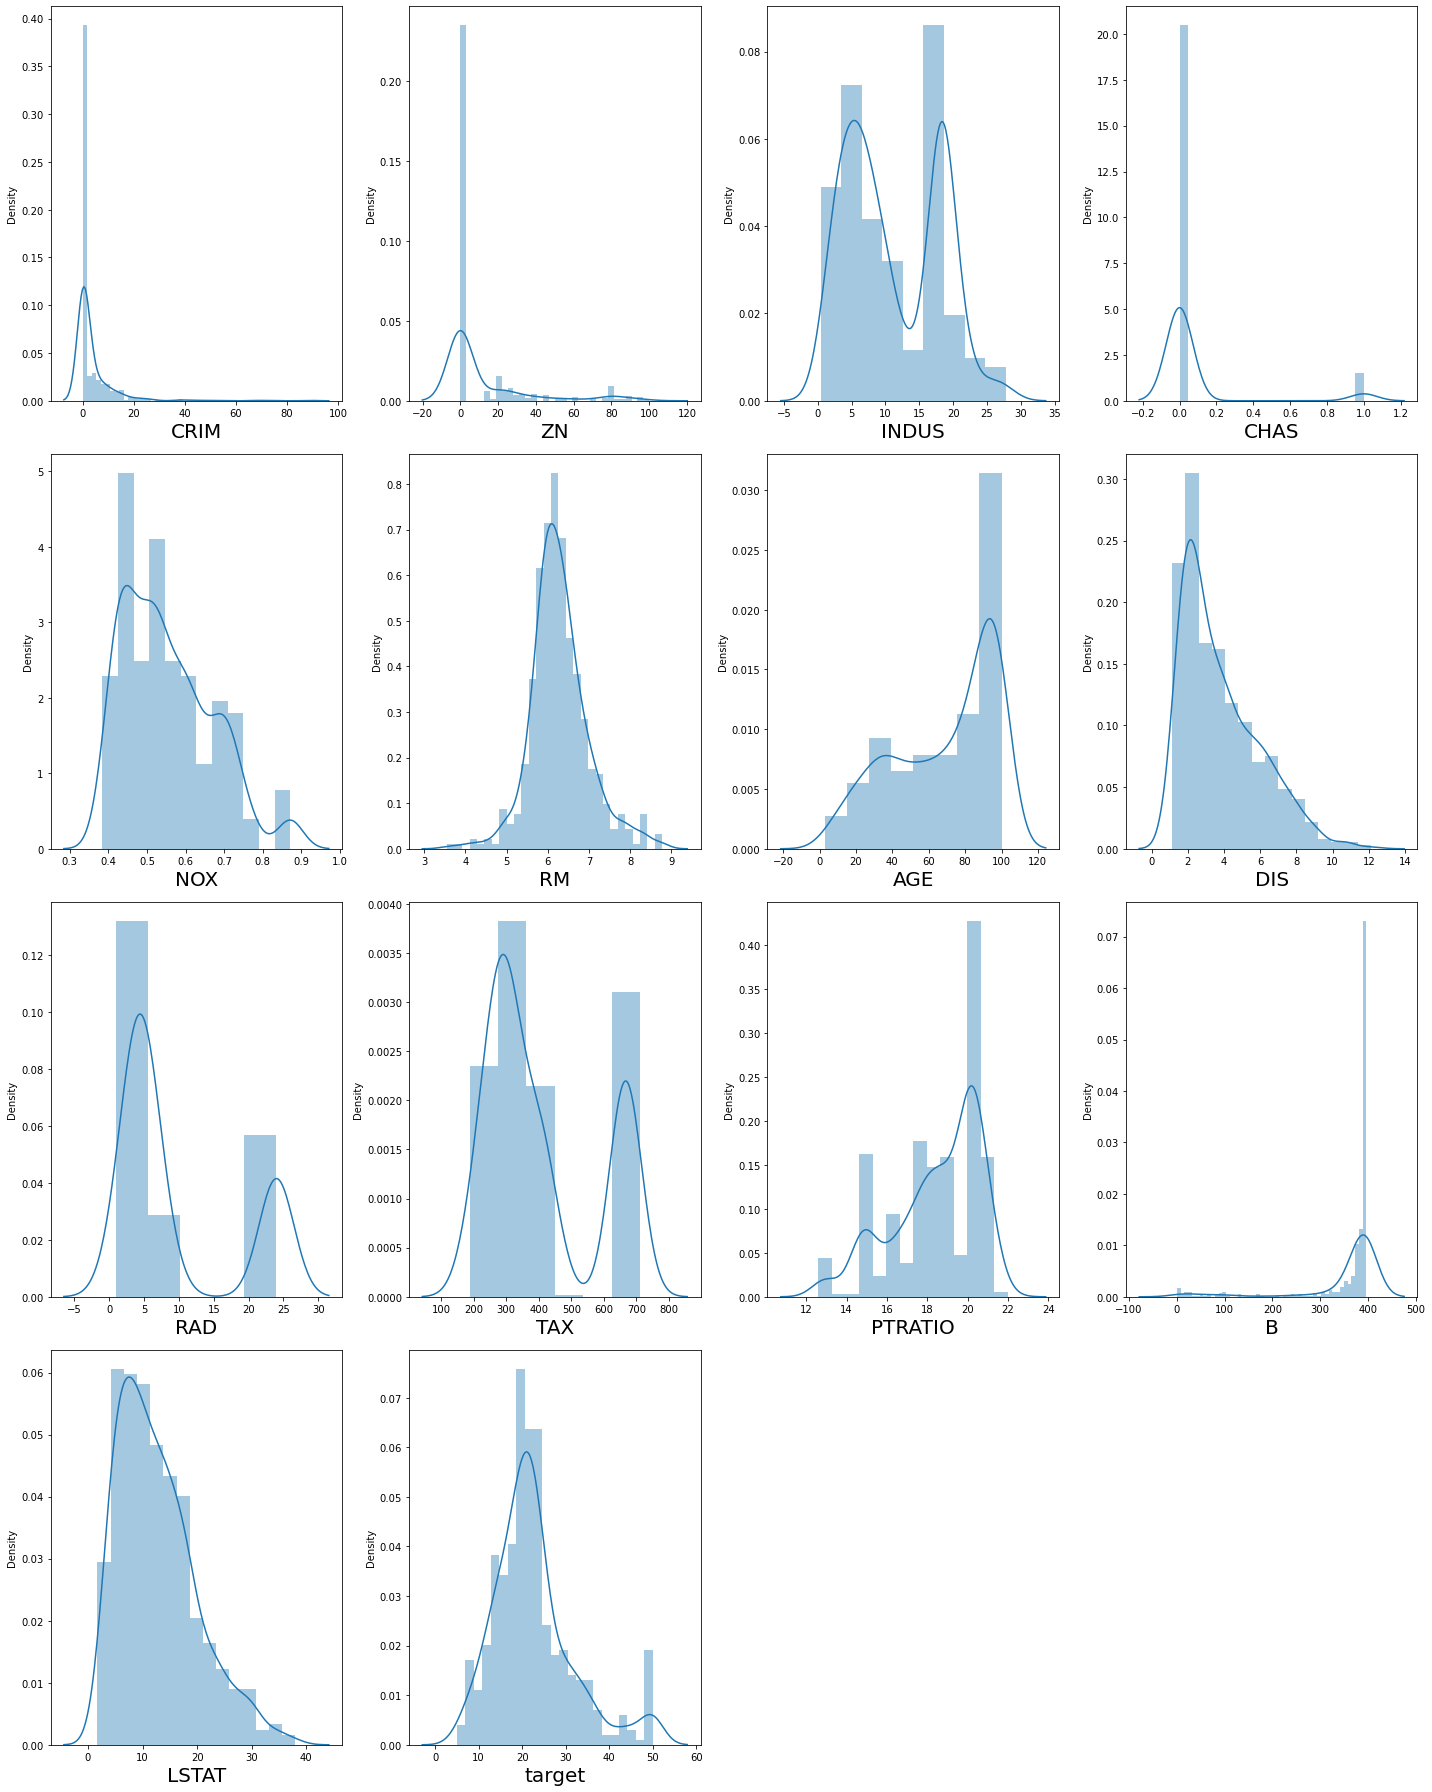

In [24]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [20]:
#investigate data.
# sns.FacetGrid(data, col='target', row='CRIM')
# plt.show()

In [3]:
### select the most important features. Some questions you can ask yourself:
#- What are the correlations?
#- Independent or dependent?
#- Does the feature have different values across the dataset?

In [21]:
# Checking the relationship between dependent and independent variables
y = data['target']
X =data.drop(columns = ['target'])

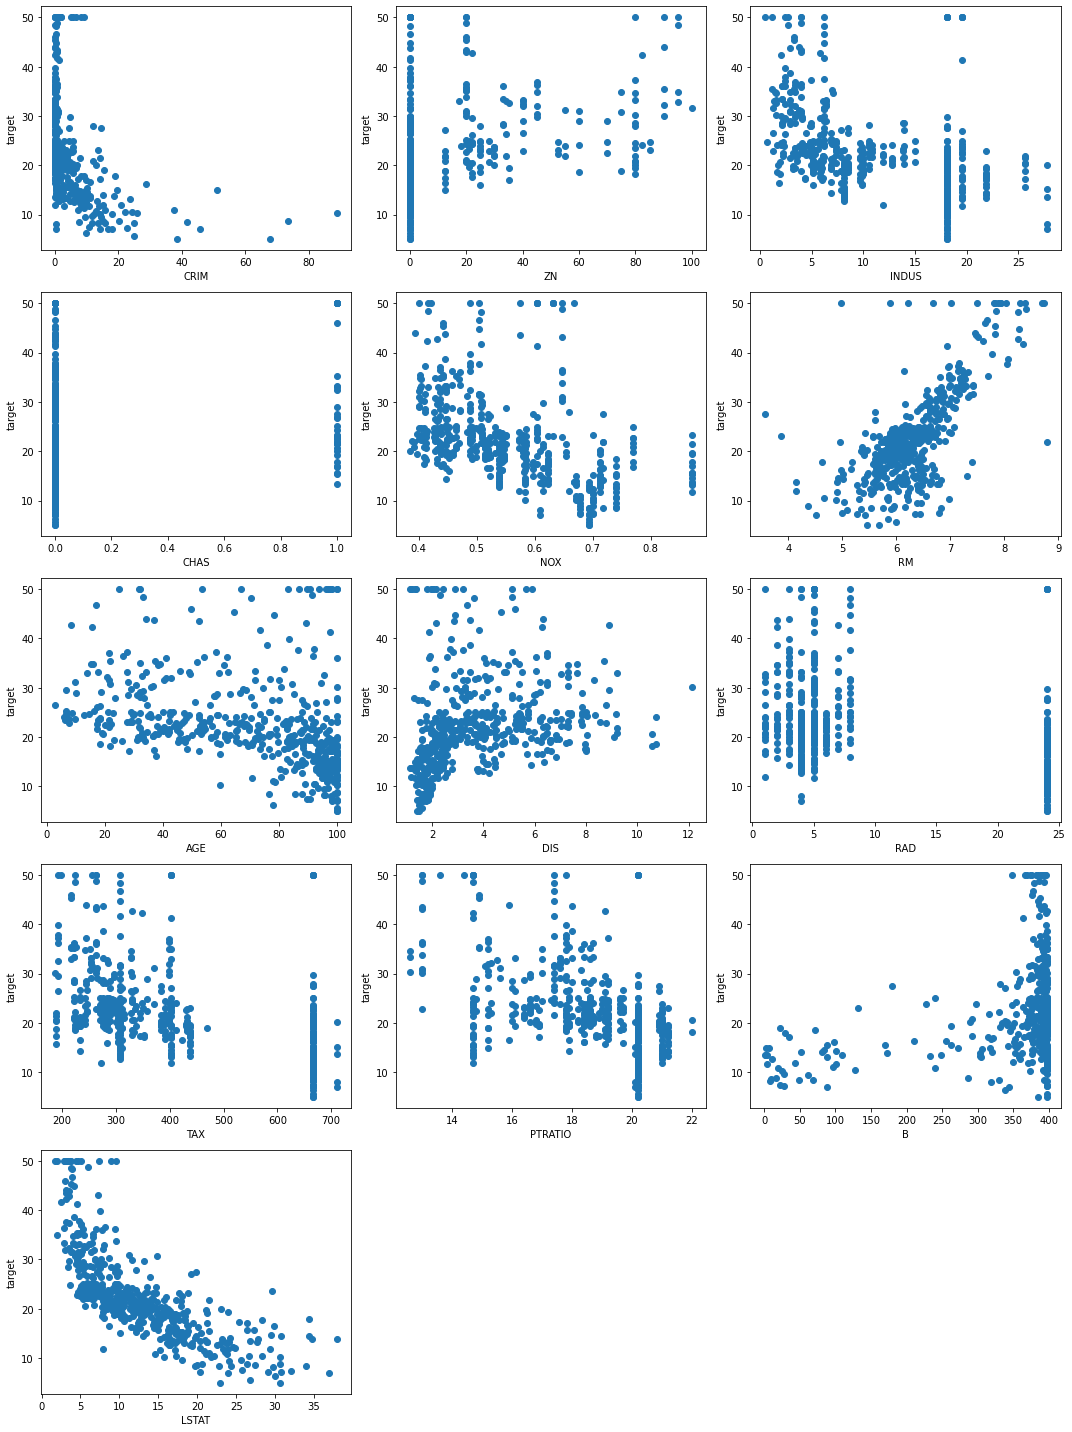

In [22]:
plt.figure(figsize=(15,20), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('target',fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [26]:
# checking the correlation of the data
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [28]:
corr.min()

CRIM      -0.388305
ZN        -0.569537
INDUS     -0.708027
CHAS      -0.121515
NOX       -0.769230
RM        -0.613808
AGE       -0.747881
DIS       -0.769230
RAD       -0.494588
TAX       -0.534432
PTRATIO   -0.507787
B         -0.444413
LSTAT     -0.737663
target    -0.737663
dtype: float64

In [31]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [55]:
## split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.20, random_state = 1)
X_train[0:5]

array([[-0.40405061, -0.48772236, -0.61672651, -0.27259857, -0.92166714,
        -0.16473953, -2.20386293,  0.91549313, -0.75292215, -1.04078303,
        -0.2568579 ,  0.29270416, -0.95921806],
       [-0.40254357,  0.58526684, -0.87644514, -0.27259857, -0.87847549,
        -0.19893134, -1.400194  ,  1.91086857, -0.17812039, -0.7378796 ,
         0.57539459,  0.37285362, -0.81203559],
       [ 1.53592609, -0.48772236,  1.01599907, -0.27259857,  1.25519204,
        -1.43553507,  1.0499294 , -1.12612225,  1.66124525,  1.53092646,
         0.80657583,  0.44105193,  2.54512652],
       [-0.41394698, -0.48772236,  0.24705682, -0.27259857, -1.01668877,
        -0.07498604, -0.52895999,  0.57950222, -0.52300145, -0.06080135,
         0.1130321 ,  0.32592617, -0.04388326],
       [ 0.60265001, -0.48772236,  1.01599907, -0.27259857,  0.25314575,
        -1.02523337,  0.07201367, -0.82312196,  1.66124525,  1.53092646,
         0.80657583, -3.87068199,  0.63175438]])

In [58]:
## Pick one model to use, such as Linear Regression -seen in class-.
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge


In [37]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
## test the accuracy and print the score with one model

In [38]:
print('Training Score: {}'.format(lm.score(X_train, y_train)))
print('Testing Score: {}'.format(lm.score(X_test, y_test)))

Training Score: 0.7293585058196337
Testing Score: 0.7634174432138472


In [56]:
## lets make sure that model is not overfittig by training model using Ridge Regression
## We will perform 10 cross validation, and receive the best co-efficients and alpha values.
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([4.8305643 , 2.80500202, 7.62312906, 4.47828461, 1.87992753,
       1.08124169, 0.6405431 , 2.65219777, 1.45026426, 9.57348328,
       2.2556769 , 6.42752698, 8.39097709, 6.13896015, 6.54998585,
       7.70748451, 4.14132048, 4.48934954, 1.89884606, 4.54360101,
       5.33216466, 0.29325373, 8.28301518, 0.50968482, 9.03244687,
       0.19892714, 1.60171648, 2.91346936, 3.00615839, 3.14407658,
       1.4740656 , 3.06983138, 3.75995392, 0.55841636, 4.49610092,
       6.96392446, 9.32227955, 9.02643192, 1.17716233, 4.40346252,
       5.50371212, 9.30813543, 6.72480553, 6.27502386, 5.20186015,
       2.84324039, 7.090746  , 6.61154192, 8.7786939 , 4.5932204 ]),
        cv=10, normalize=True)

In [60]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.19892713648045124)

In [61]:
print('Training Score: {}'.format(ridge_model.score(X_train, y_train)))
print('Testing Score: {}'.format(ridge_model.score(X_test, y_test)))

Training Score: 0.7293575870039543
Testing Score: 0.7634162903616476


We received same result as our regular linear regression so it is safe to say that our model is not overfitting.